In [5]:
import os

current_dir = os.getcwd()  # os.path.dirname(__file__)
current_dir

main_dir = os.path.dirname(current_dir)
main_dir

'/Users/4cd87a/Documents/Projects/PhD/codes/pulsefig/docs/examples'

In [6]:
files = os.listdir(current_dir)

files_to_analyze = []
for file in files:
    if file.endswith(".py") and file.startswith("ex"):
        files_to_analyze.append(file)
files_to_analyze

['example_1.py', 'example_2.py', 'example_3.py']

In [7]:
def create_markdown(name, docstring, code):
    md = ""
    md += docstring
    md += f"```python\n{code}\n```"
    md += f"\n ![{name}](figures/{name}.svg)"
    with open(os.path.join(main_dir, name) + ".md", "w") as file:
        file.write(md)


def create_index(names: list[str]):
    md = "# Different example\n"
    md += "Here is examples for different plots\n"
    for name in names:
        nice_name = name.replace("_", " ").capitalize()
        md += f"\n### [{nice_name}]({name}.md)\n"
        md += f"![{name}](figures/{name}.svg)\n"

    with open(os.path.join(main_dir, "index.md"), "w") as file:
        file.write(md)

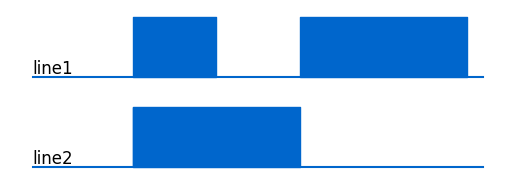

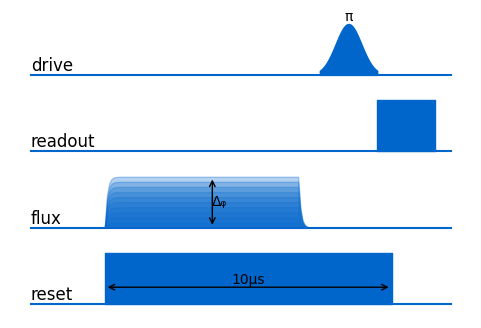

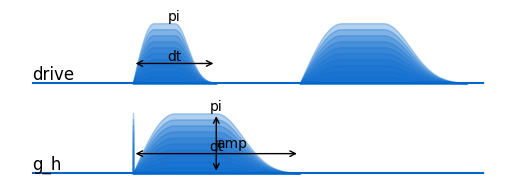

In [8]:
all_names = []
for file in files_to_analyze:
    total_code = open(file).read()
    index_docstring = total_code.find('"""', 4)
    code = total_code[index_docstring + 3 :]
    docstring = total_code[3:index_docstring]
    name = file[:-3]
    create_markdown(name, docstring, code)
    exec(total_code)
    all_names.append(name)

create_index(all_names)